In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from math import sqrt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge


## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import LabelEncoder

In [2]:
#Cargar el archivo csv
path = 'C:/THE BRIDGE_GIT/Machine_Learning/anime_score_detection_model_regresion/src/'
df_anime = pd.read_csv(path + "data/raw/anime.csv", na_values = ['Unknown'],index_col = 0)

In [3]:
#Ver el dataset
df_anime.head(2)

,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
MAL_ID,,,,,,,,,,,,,,,,,,,,,
1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17562 entries, 1 to 48492
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           17562 non-null  object 
 1   Score          12421 non-null  float64
 2   Genres         17499 non-null  object 
 3   English name   6997 non-null   object 
 4   Japanese name  17514 non-null  object 
 5   Type           17525 non-null  object 
 6   Episodes       17046 non-null  float64
 7   Aired          17253 non-null  object 
 8   Premiered      4745 non-null   object 
 9   Producers      9768 non-null   object 
 10  Licensors      3946 non-null   object 
 11  Studios        10483 non-null  object 
 12  Source         13995 non-null  object 
 13  Duration       17007 non-null  object 
 14  Rating         16874 non-null  object 
 15  Ranked         15800 non-null  float64
 16  Popularity     17562 non-null  int64  
 17  Members        17562 non-null  int64  
 18  Favori

In [5]:
print(f"Número total de registros: {len(df_anime)}")

Número total de registros: 17562


In [6]:
#Ver valores missing a comparación con el total de registros 
print(df_anime.isnull().sum()/len(df_anime) * 100)

Name              0.000000
Score            29.273431
Genres            0.358729
English name     60.158296
Japanese name     0.273317
Type              0.210682
Episodes          2.938162
Aired             1.759481
Premiered        72.981437
Producers        44.379911
Licensors        77.531033
Studios          40.308621
Source           20.310899
Duration          3.160232
Rating            3.917549
Ranked           10.033026
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          2.488327
Score-9          18.033254
Score-8           7.806628
Score-7           2.864138
Score-6           2.909691
Score-5           3.325362
Score-4           5.563148
Score-3           7.442205
Score-2           9.093497
Score-1           2.613598
dtype: float64


In [7]:
#Lectura de dataset por temporada de anime
df_season = pd.read_csv(path + "data/raw/anime_season.csv")

In [8]:
#Ver dataframe
df_season

,Month_emision,Season
0,Jan,Winter
1,Feb,Winter
2,Mar,Winter
3,Apr,Spring
4,May,Spring
5,Jun,Spring
6,Jul,Summer
7,Aug,Summer
8,Sep,Summer
9,Oct,Fall


# Limpieza de Datos

In [9]:
#Eliminar columnas que no se usarán para el análisis
df_anime.drop(['Name' , 'English name' , 'Japanese name','Watching', 'On-Hold', 'Dropped', 'Ranked', 'Popularity',
              'Licensors','Plan to Watch','Producers','Source','Completed','Favorites','Duration','Members'] , axis = 1 , inplace = True)

### Transformaciones

In [10]:
#Creación de campo para obtener el año de emision del anime
df_anime['Start_year'] = df_anime['Aired'].dropna(axis = 0).apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[1] if len(x) > 1 else x[0] ).apply(
                          lambda x : x.replace(' ', ''))

In [11]:
# Creación de campo para obtener el mes de emision del anime
df_anime['Start_Month'] = df_anime['Aired'].dropna(axis = 0).apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[0] ).apply(
                              lambda x : x.split(' ')[0])

In [12]:
# Creación de campo que contenga la estación cuando se emitió el anime
df_anime['Season'] = df_anime['Premiered'].dropna(axis = 0).apply(lambda x : x.split(' ')[0])

### Missing values

Pudimos revisar que habían valores en 'Season' nulos, sin embargo tenía el mes de emisión 'Start_Month'.\
Lo que se realizará a continuación será rellenar esos espacios vacios con la el dataframe de estaciones.

In [13]:
df_anime_1 = pd.merge(
    left=df_anime,right=df_season, how='left', left_on='Start_Month', right_on='Month_emision'
    )

df_anime_1['Start_season'] = np.where(df_anime_1['Season_x'].isna(),
                                        df_anime_1['Season_y'],df_anime_1['Season_x'])

Visualizamos además valores nulos en la columna 'Score', por lo que se recalculará con la información que tenemos de los numeros de usuarios que puntuan cada score.

In [14]:
df_anime_1 = df_anime_1.assign(New_score=lambda x:((x['Score-10']*10 + x['Score-9']*9 + x['Score-8']*8
  + x['Score-7']*7 + x['Score-6']*6 + x['Score-5']*5 + x['Score-4']*4 + x['Score-3']*3 + x['Score-2']*2
  + x['Score-1'])/(x['Score-10'] + x['Score-9'] + x['Score-8']+ x['Score-7'] + x['Score-6'] + x['Score-5']
  + x['Score-4'] + x['Score-3'] + x['Score-2']+ x['Score-1'])))

df_anime_1['New_score2'] = np.where(df_anime_1['Score'].isna(),
                                    df_anime_1['New_score'],df_anime_1['Score'])

In [15]:
#Eliminar columnas que no se usarán para el análisis
df_anime_1.drop(['Premiered','Aired',
       'Start_Month','Season_x','Month_emision','Season_y', 'Score-10', 
       'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4', 'Score-3', 
       'Score-2', 'Score-1','Score','New_score'] , axis = 1 , inplace = True)

# Renombramos la columna 'New_score2' para su mejor entendimiento
df_anime_1.rename(columns={'New_score2':'Score'}, inplace=True)

In [16]:
#Eliminando valores missing
df_anime_2 = df_anime_1.dropna(axis = 0).copy()

In [17]:
#Se cambia el tipo de dato de las columnas Score y Episodes
# a el tipo de dato que deberían tener
df_anime_2['Score'] = df_anime_2['Score'].astype('float')
df_anime_2['Episodes'] = df_anime_2['Episodes'].astype('int')

In [18]:
#Se cambia el tipo de dato de las columnas Score y Episodes
# a el tipo de dato que deberían tener
df_anime_2['Score'] = df_anime_2['Score'].astype('float')
df_anime_2['Episodes'] = df_anime_2['Episodes'].astype('int')
df_anime_2[['Episodes','Score']].info()
#Porcentaje de malores missing hallados
print(df_anime_2.isnull().sum()/len(df_anime_2) * 100)
#Nuevo numero de registros
print(f"Número total de registros antes: {len(df_anime)}")
print(f"Número total de registros ahora: {len(df_anime_2)}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 17552
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Episodes  9083 non-null   int32  
 1   Score     9083 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 177.4 KB
Genres          0.0
Type            0.0
Episodes        0.0
Studios         0.0
Rating          0.0
Start_year      0.0
Start_season    0.0
Score           0.0
dtype: float64
Número total de registros antes: 17562
Número total de registros ahora: 9083


### Outliers

Se empleará el Z score en 'Episodes' para comprender qué tan lejos está el punto de datos de la media

In [19]:
# calculate mean
mean = np.mean(df_anime_2['Episodes'].values) 
# calculate standard deviation
sd = np.std(df_anime_2['Episodes'].values)
# determine a threhold
threshold = 3

# create empty list to store outliers
outliers = []

# detect outlier
for i in df_anime_2['Episodes'].values: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list# print outliers    

outliers.sort()
print("The detected outliers are: ", outliers)

The detected outliers are:  [142, 143, 145, 146, 147, 148, 148, 148, 150, 151, 151, 153, 153, 154, 155, 156, 156, 160, 161, 163, 164, 164, 167, 170, 172, 175, 178, 178, 180, 182, 191, 192, 193, 195, 195, 199, 201, 203, 214, 215, 220, 224, 237, 237, 243, 258, 276, 283, 291, 296, 296, 300, 305, 330, 331, 358, 366, 373, 500, 526, 694, 1428, 1471, 1787, 1818]


In [20]:
min_outlier = np.min(outliers)
max_outlier = np.max(outliers)
count_outliers = np.count_nonzero(outliers)
print('min_outlier:',min_outlier,'\nmax_outlier:',max_outlier, '\ncount_outliers:',count_outliers)

min_outlier: 142 
max_outlier: 1818 
count_outliers: 65


- El Z score detectó correctamente 65 valores atípicos.
- Se usó un umbral arbitrario de 3, más allá del cual todos los puntos de datos se marcan como valores atípicos.

In [21]:
# Remover outliers encontrados
df_anime_2 = df_anime_2[~(df_anime_2.Episodes.isin(outliers))]

# Análisis
## Variables Numericas
### Score

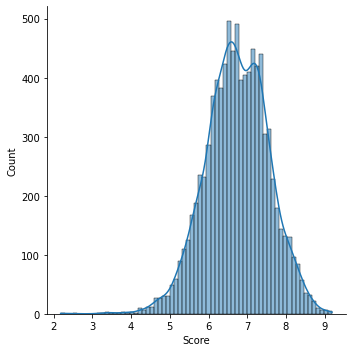

In [22]:
#Distribución de  de Score
sns.displot(df_anime_2.Score, kde = True)

Se puede observar que la mayoría de los animes tienen de 6 a 8 como puntaje.

<AxesSubplot:ylabel='Score'>

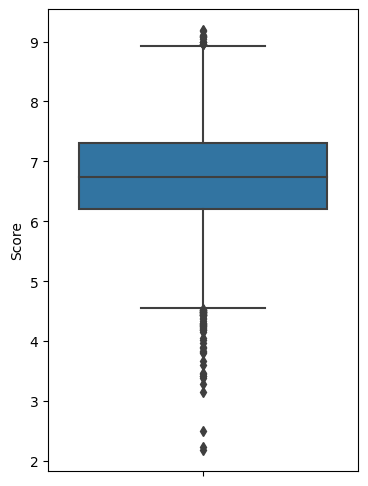

In [23]:
plt.figure(figsize=(4,6))
sns.boxplot(data = df_anime_2 , y = 'Score')

Observamos que la puntuación tiene valores atípicos, ya sea valores máximos o mínimos. Se puede afirmar que más del 50% de los animes tienen una puntuación superior a 6.


### Episodes

In [24]:
df_anime_2.Episodes.describe()

count    9018.000000
mean       11.853959
std        16.852098
min         1.000000
25%         1.000000
50%         4.000000
75%        13.000000
max       140.000000
Name: Episodes, dtype: float64

<AxesSubplot:ylabel='Episodes'>

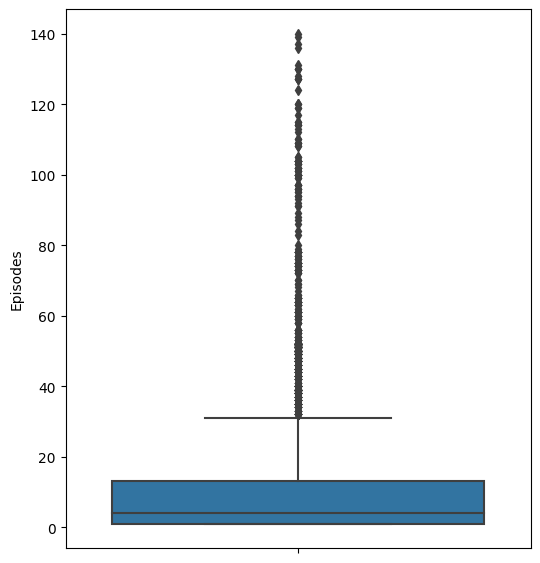

In [25]:
plt.figure(figsize=(6,7))
sns.boxplot(data = df_anime_2 , y = 'Episodes'  )

Se puede observar que el 75% de los animes son de 13 episodios.

## Variables Categoricas

In [26]:
# Función que separará en valores individuales las columnas que lo requieran
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

### Genres

Se debe tener en cuenta que un anime no necesariamente tiene un solo género, puede tener incluso más de 4 géneros, por lo que para el análisis separamos estos géneros y analizamos los que más se repetían en el conjunto de datos.

In [27]:
df_anime_2['Genres_Split'] = df_anime_2['Genres'].apply(lambda x : x.replace(' ' , ''))
df_anime_2['Genres_Split'] = df_anime_2['Genres_Split'].apply(lambda x : x.split(','))

In [28]:
gs_top10 = to_1D(df_anime_2['Genres_Split']).value_counts().head(10).index
ngs_top10  = to_1D(df_anime_2['Genres_Split']).value_counts().head(10)

In [29]:
#Top 10
ngs_top10

Comedy         3888
Action         2847
Fantasy        1968
Adventure      1945
Sci-Fi         1893
Drama          1777
Shounen        1590
Romance        1491
School         1285
SliceofLife    1200
dtype: int64

<AxesSubplot:>

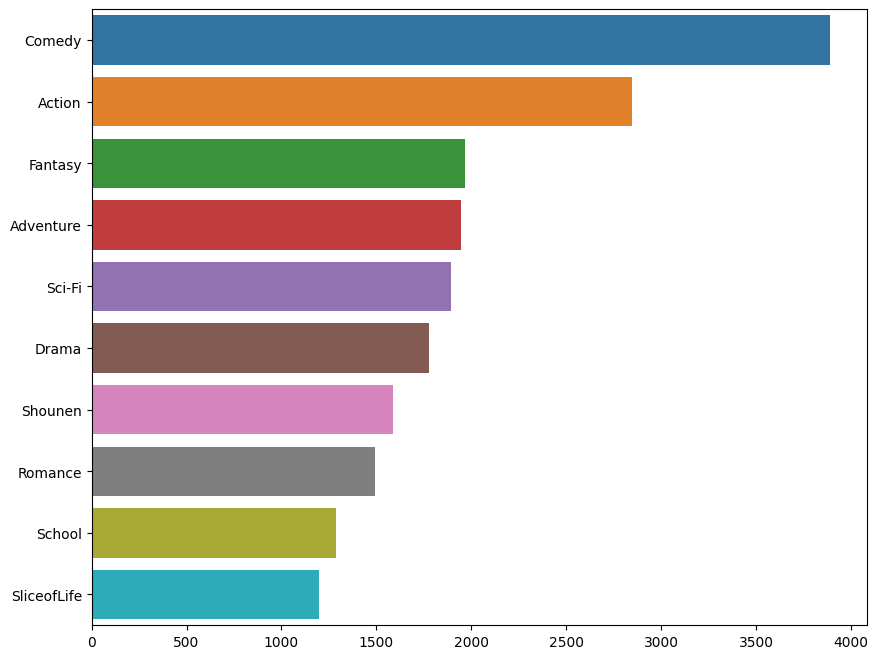

In [30]:
plt.figure(figsize=(10,8))

sns.barplot(y = gs_top10 , x = ngs_top10 )

Se observa que el género 'Comedia' está presente en la mayoría de los animes.

### Type

In [31]:
df_anime_2['Type'].value_counts()

TV         3643
OVA        1799
Special    1360
Movie      1353
ONA         690
Music       173
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

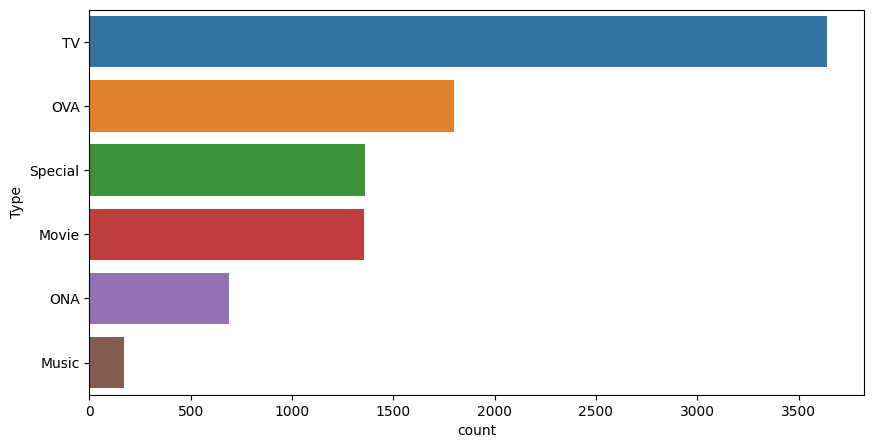

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime_2 , y = 'Type' , order = df_anime_2['Type'].value_counts().index)

Observamos que predominan los animes de TV en el conjunto de datos.

### Studios

Similar al campo 'Genres', este campo también puede contar con más de 1 estudio por anime, por lo que se analizará qué estudio es el que más colaboración tiene al producir un anime.

In [33]:
df_anime_2['Studios_Split'] = df_anime_2['Studios'].apply(lambda x : x.replace(' ' , ''))
df_anime_2['Studios_Split']= df_anime_2['Studios_Split'].apply(lambda x : x.split(','))

In [34]:
studios_top10 = to_1D(df_anime_2['Studios_Split']).value_counts()[1:11].index
nstudios_top10  = to_1D(df_anime_2['Studios_Split']).value_counts()[1:11]

In [35]:
nstudios_top10

Sunrise             465
Madhouse            353
J.C.Staff           353
ProductionI.G       308
StudioDeen          267
TMSEntertainment    235
StudioPierrot       235
OLM                 210
A-1Pictures         200
NipponAnimation     171
dtype: int64

<AxesSubplot:>

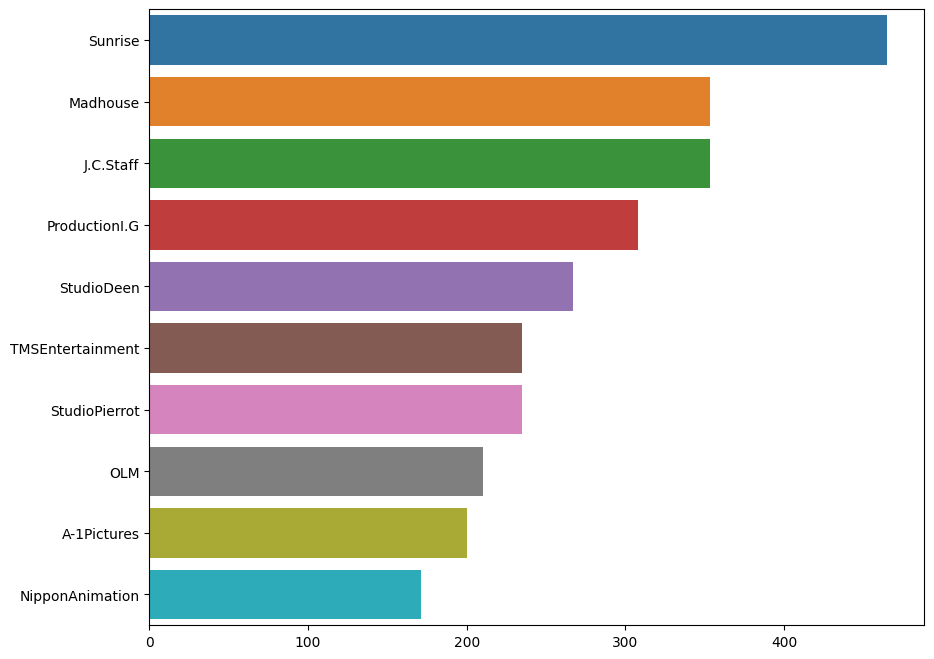

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(y = studios_top10 , x = nstudios_top10 )

Se observa que el estudio de anime que produce más animes es 'Sunrise', este estudio tiene animes conocidos como Code Guess, Gintama, Inuyasha, entre otros.

### Rating

In [37]:
df_anime_2['Rating'].value_counts()

PG-13 - Teens 13 or older         4813
G - All Ages                      1372
R - 17+ (violence & profanity)     979
R+ - Mild Nudity                   755
PG - Children                      678
Rx - Hentai                        421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Rating'>

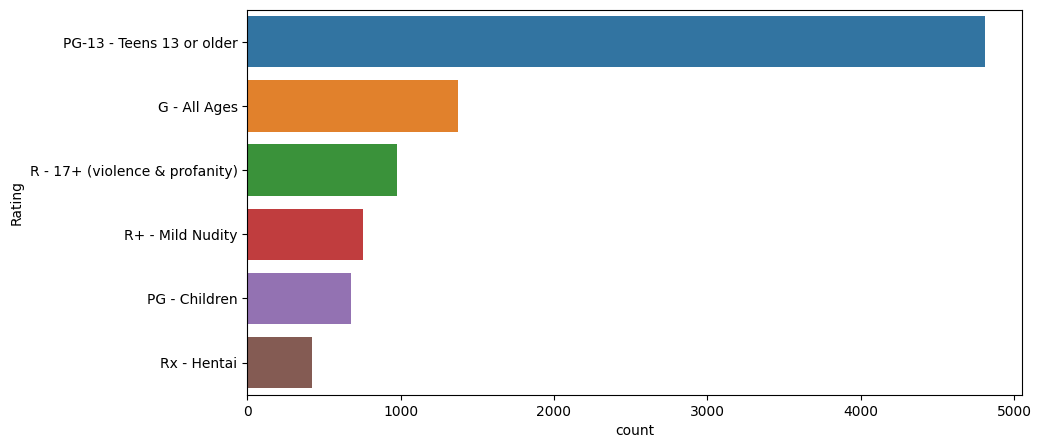

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime_2 , y = 'Rating' , order = df_anime_2['Rating'].value_counts().index)

Se observa que la mayoría de animes son dirigidos para un publico de 13 años a más.

### Start Year

In [39]:
syear_top10 = df_anime_2['Start_year'].value_counts().head(10).index
nsyear_top10 = df_anime_2['Start_year'].value_counts().head(10)

In [40]:
nsyear_top10

2016    561
2017    519
2018    510
2015    483
2014    474
2012    419
2013    416
2019    400
2011    387
2010    351
Name: Start_year, dtype: int64

<AxesSubplot:xlabel='Start_year'>

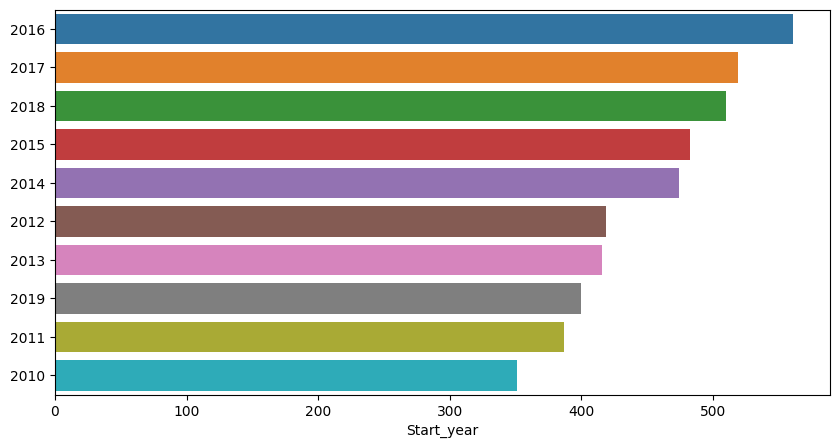

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(y = syear_top10 , x = nsyear_top10 )

Se observa que el año 2016 fue el año cuando se emitió la mayoría de los animes. Y el año que le sigue con mas cantidad es el 2017.

### Start_season

In [42]:
startseason = df_anime_2['Start_season'].value_counts().head(10).index
nstartseason = df_anime_2['Start_season'].value_counts().head(10)

In [43]:
nstartseason

Fall      2502
Spring    2282
Summer    2144
Winter    2090
Name: Start_season, dtype: int64

<AxesSubplot:xlabel='Start_season'>

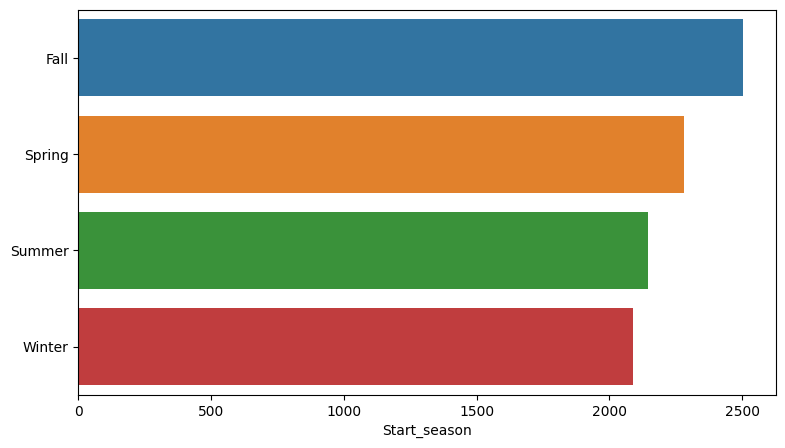

In [44]:
plt.figure(figsize=(9,5))
sns.barplot(y = startseason, x = nstartseason )

Se observa que la mayoría de animes se emiten en Otoño.

# Análisis Bivariante

In [45]:
def get_data(col_index_name , col_target_name): # col_name es la columna de la que queremos extraer los datos

  datos = []
  cont = 0
  index_column = df_anime_2.columns.get_loc(col_target_name) # Para saber el indice de la columna
  for list_gen in df_anime_2[col_index_name]:

    for gen in list_gen:
        
        val = df_anime_2.iloc[cont , index_column ] # encuentra el valor de la columna
        datos.append(val) # almacenar valores a la lista de datos

    cont += 1   


  return pd.Series(datos)

### Score - Episodes

<AxesSubplot:xlabel='Episodes', ylabel='Score'>

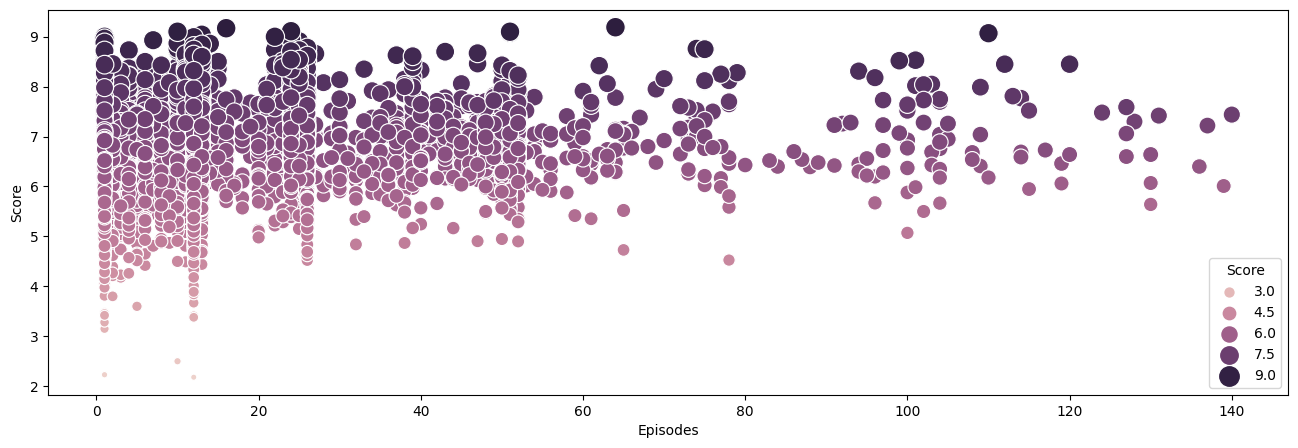

In [46]:
plt.figure(figsize=(16,5))
sns.scatterplot(data = df_anime_2 , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

Podemos ver que, los animes con episodios más cortos en mayoría tienen más puntuación.

In [47]:
corr_r = df_anime_2['Episodes'].corr(df_anime_2['Score'] , method = 'pearson')
corr_r

0.11757932052398415

Nos indica una correlación mínima

In [48]:
# Hallamos el coeficiente de determinación
(corr_r**2)*100

1.3824896614881799

Gracias al coeficiente de determinación, podemos decir que la relación entre la cantidad de episodios de los animes y su puntaje es lineal (positiva o creciente) solo en un 1.38 %.

### Score - Genres

In [49]:
score_get = get_data('Genres_Split' , 'Score')

In [50]:
df_anime_aux = pd.DataFrame()

In [51]:
#Se crea el df con los generos separados por el score
df_anime_aux['Genres'] = to_1D(df_anime_2['Genres_Split'])
df_anime_aux['Score'] = score_get
df_anime_aux.head()

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78


In [52]:
gen_score__median_top10  = df_anime_aux.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
gen_score__median_top10

,Genres,Score
39,Thriller,7.51
24,Psychological,7.33
21,Mystery,7.25
14,Josei,7.13
32,Shounen,7.13
6,Drama,7.12
23,Police,7.10
38,Supernatural,7.10
29,Seinen,7.08
19,Military,7.08


<AxesSubplot:xlabel='Score', ylabel='Genres'>

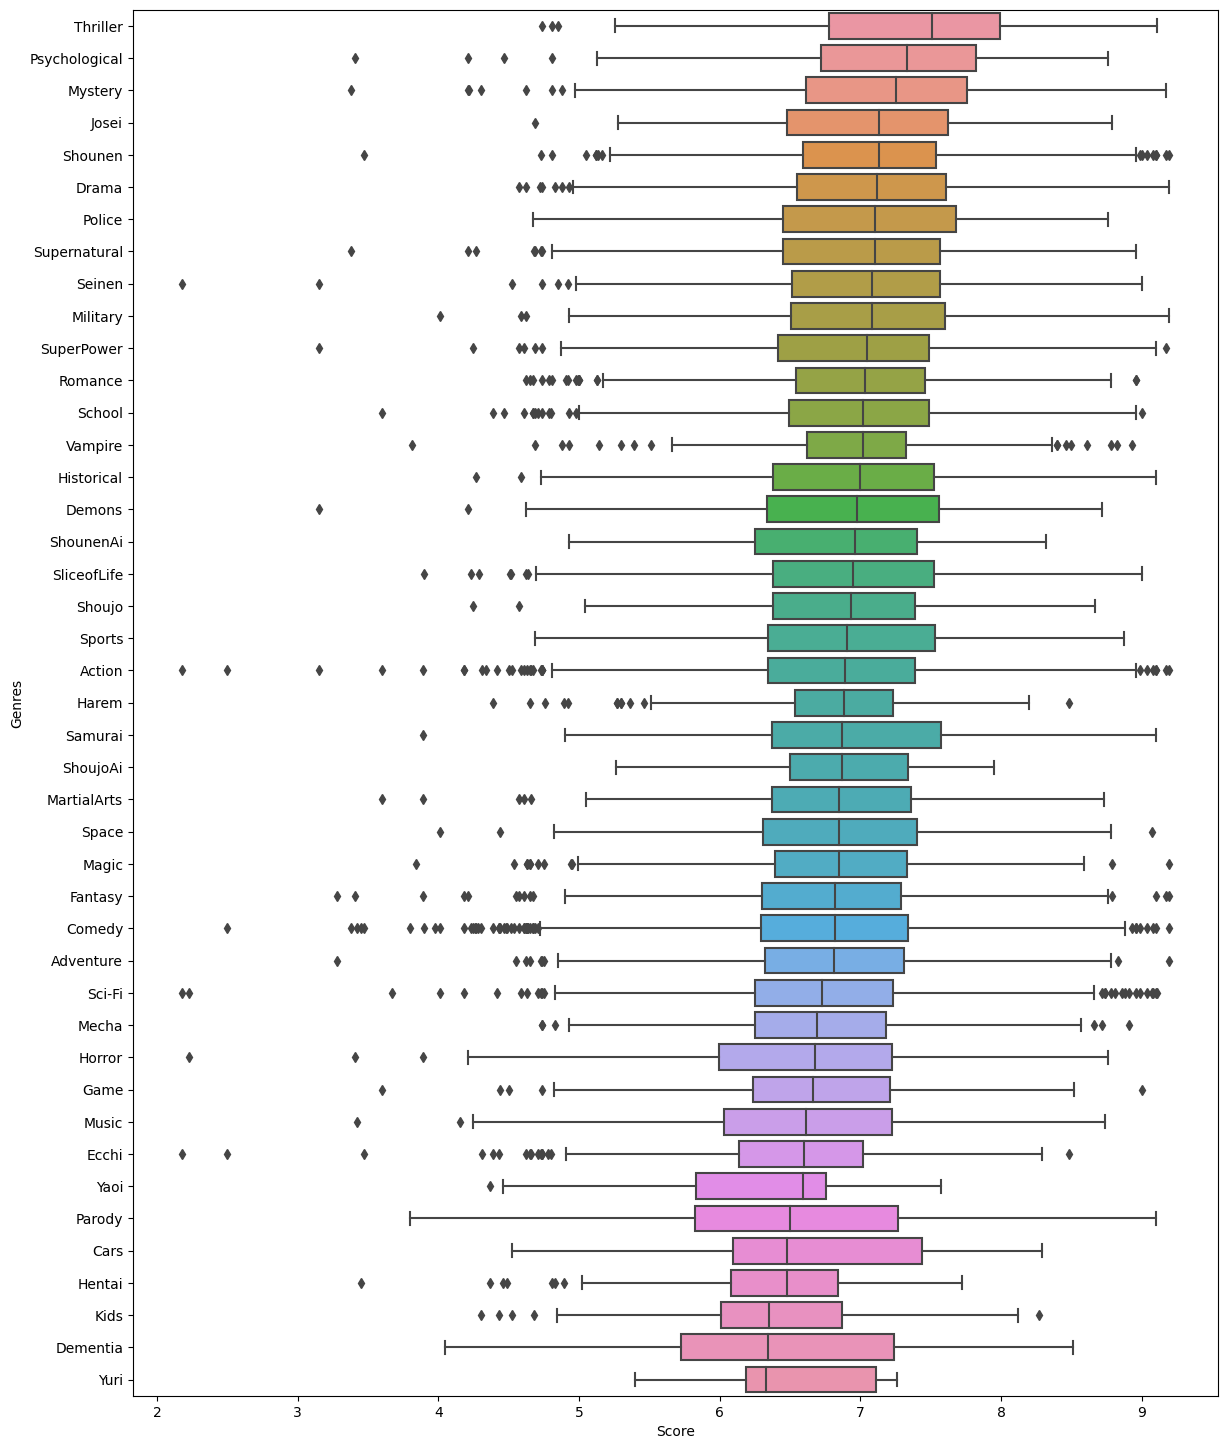

In [53]:
order_graph = df_anime_aux.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)
plt.figure(figsize=(14,18))
sns.boxplot(y= 'Genres', x = 'Score' , data= df_anime_aux ,
            order = order_graph['Genres'])

In [54]:
fil = df_anime_aux[df_anime_aux['Genres'].isin(gen_score__median_top10['Genres'])]
fil

,Genres,Score
3,Drama,8.78
7,Drama,8.39
8,Mystery,8.39
15,Drama,8.24
16,Shounen,8.24
...,...,...
31817,Mystery,4.81
31818,Psychological,4.81
31819,Supernatural,4.81
31820,Thriller,4.81


<AxesSubplot:xlabel='Genres', ylabel='Score'>

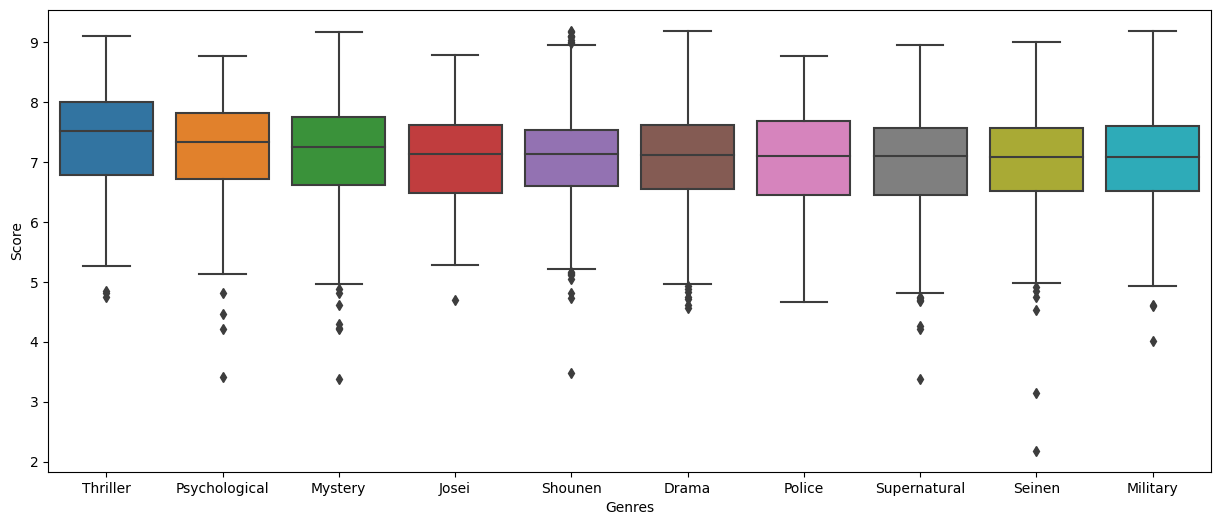

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres', y = 'Score' , data= fil , order = gen_score__median_top10['Genres'] )

In [56]:
filgenres_top10 = df_anime_aux[df_anime_aux['Genres'].isin(gs_top10)]
filgenres_top10

,Genres,Score
0,Action,8.780000
1,Adventure,8.780000
2,Comedy,8.780000
3,Drama,8.780000
4,Sci-Fi,8.780000
...,...,...
31811,Fantasy,6.515152
31812,Sci-Fi,6.410000
31816,Romance,7.520000
31821,Shounen,4.810000


In [57]:
gen_score__median_top10  = filgenres_top10.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

gen_score__median_top10

,Genres,Score
8,Shounen,7.130
3,Drama,7.120
5,Romance,7.030
6,School,7.020
9,SliceofLife,6.945
0,Action,6.890
2,Comedy,6.820
4,Fantasy,6.820
1,Adventure,6.810
7,Sci-Fi,6.730


<AxesSubplot:xlabel='Genres', ylabel='Score'>

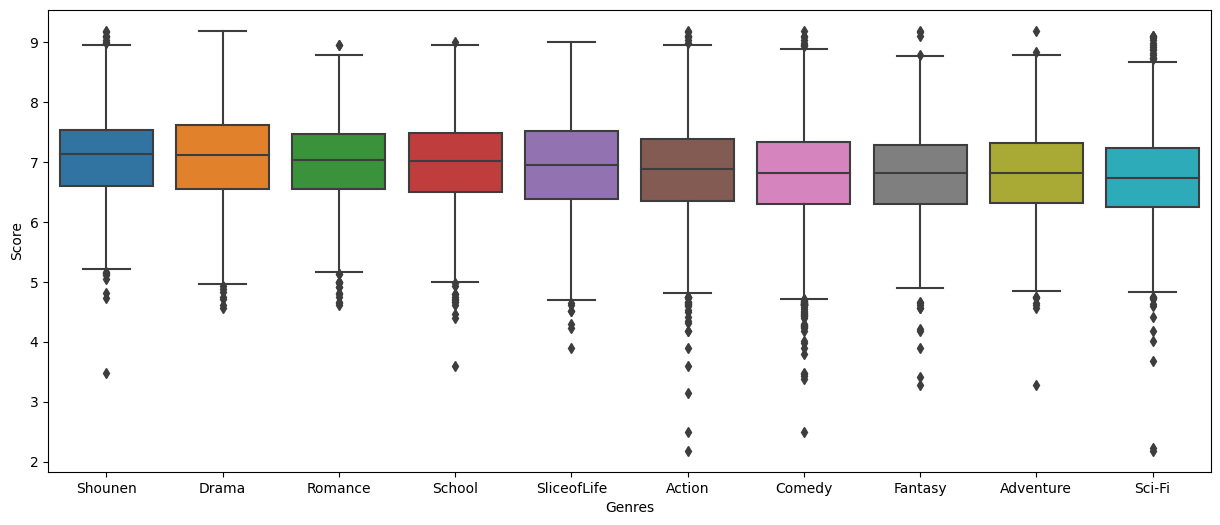

In [58]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres' , y = 'Score', data = filgenres_top10 , order= gen_score__median_top10['Genres'] )

Se puede observar que el género Shounen es el mejor puntuado por los usuarios de myanimelist.net.

### Score - Type

In [59]:
df_anime_2.groupby(['Type']).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

,Score
Type,
Movie,7.01
TV,6.91
Special,6.60
OVA,6.55
ONA,6.36
Music,6.34


<AxesSubplot:xlabel='Score', ylabel='Type'>

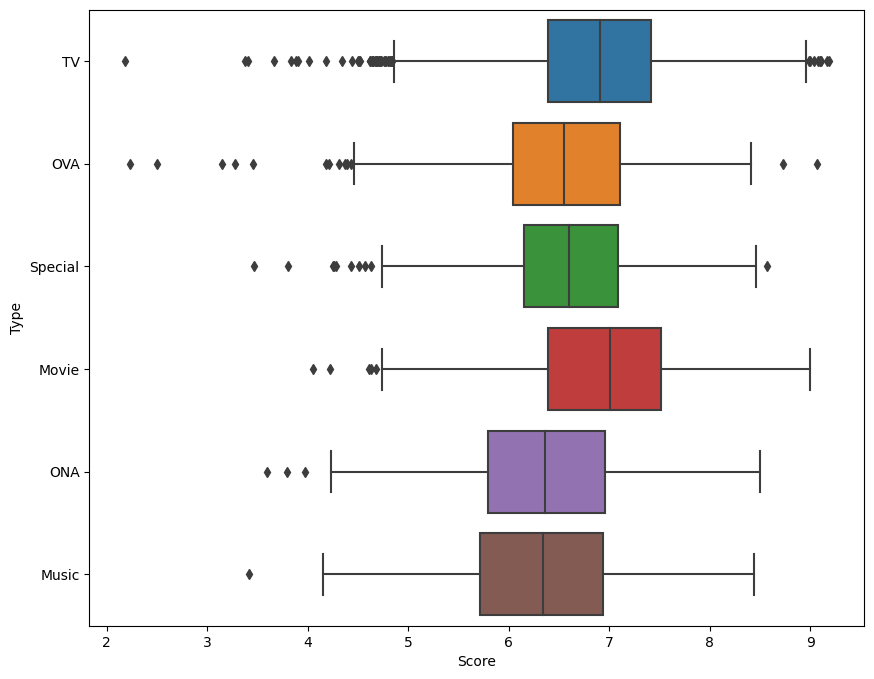

In [60]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'Type', x = 'Score' , data= df_anime_2 ,
            order = df_anime_2['Type'].value_counts().index)

Se observa que los animes de TV son los mejor valorados.

### Score - Studios

In [61]:
score_get = get_data('Studios_Split', 'Score')
df_anime_aux2 = pd.DataFrame() #New DataFrame

#Set the producers columns with their score
df_anime_aux2['Studios'] = to_1D(df_anime_2['Studios_Split'])
df_anime_aux2['Score'] = score_get
df_anime_aux2.head()

,Studios,Score
0,Sunrise,8.78
1,Bones,8.39
2,Madhouse,8.24
3,Sunrise,7.27
4,ToeiAnimation,6.98


In [62]:
std_score__median_top10  = df_anime_aux2.groupby(['Studios'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
std_score__median_top10

,Studios,Score
463,StudioBind,8.370
153,EggFirm,8.335
467,StudioChizu,8.330
324,NipponRamayanaFilmCo.,8.040
106,Colored-PencilAnimationDesign,8.030
435,Shuka,8.010
416,SamsaraAnimationStudio,8.000
137,DjinnPower,7.830
448,SquareEnix,7.760
388,PurpleCowStudioJapan,7.720


In [63]:
fil2 = df_anime_aux2[df_anime_aux2['Studios'].isin(std_score__median_top10['Studios'])]
fil2

,Studios,Score
300,SquareEnix,7.760
1243,SquareEnix,6.370
2419,SquareEnix,7.960
3189,NipponRamayanaFilmCo.,8.040
4978,StudioChizu,8.640
5001,PurpleCowStudioJapan,8.050
5140,PurpleCowStudioJapan,7.390
6163,Shuka,8.030
6529,Shuka,8.010
6530,Shuka,8.100


<AxesSubplot:xlabel='Studios', ylabel='Score'>

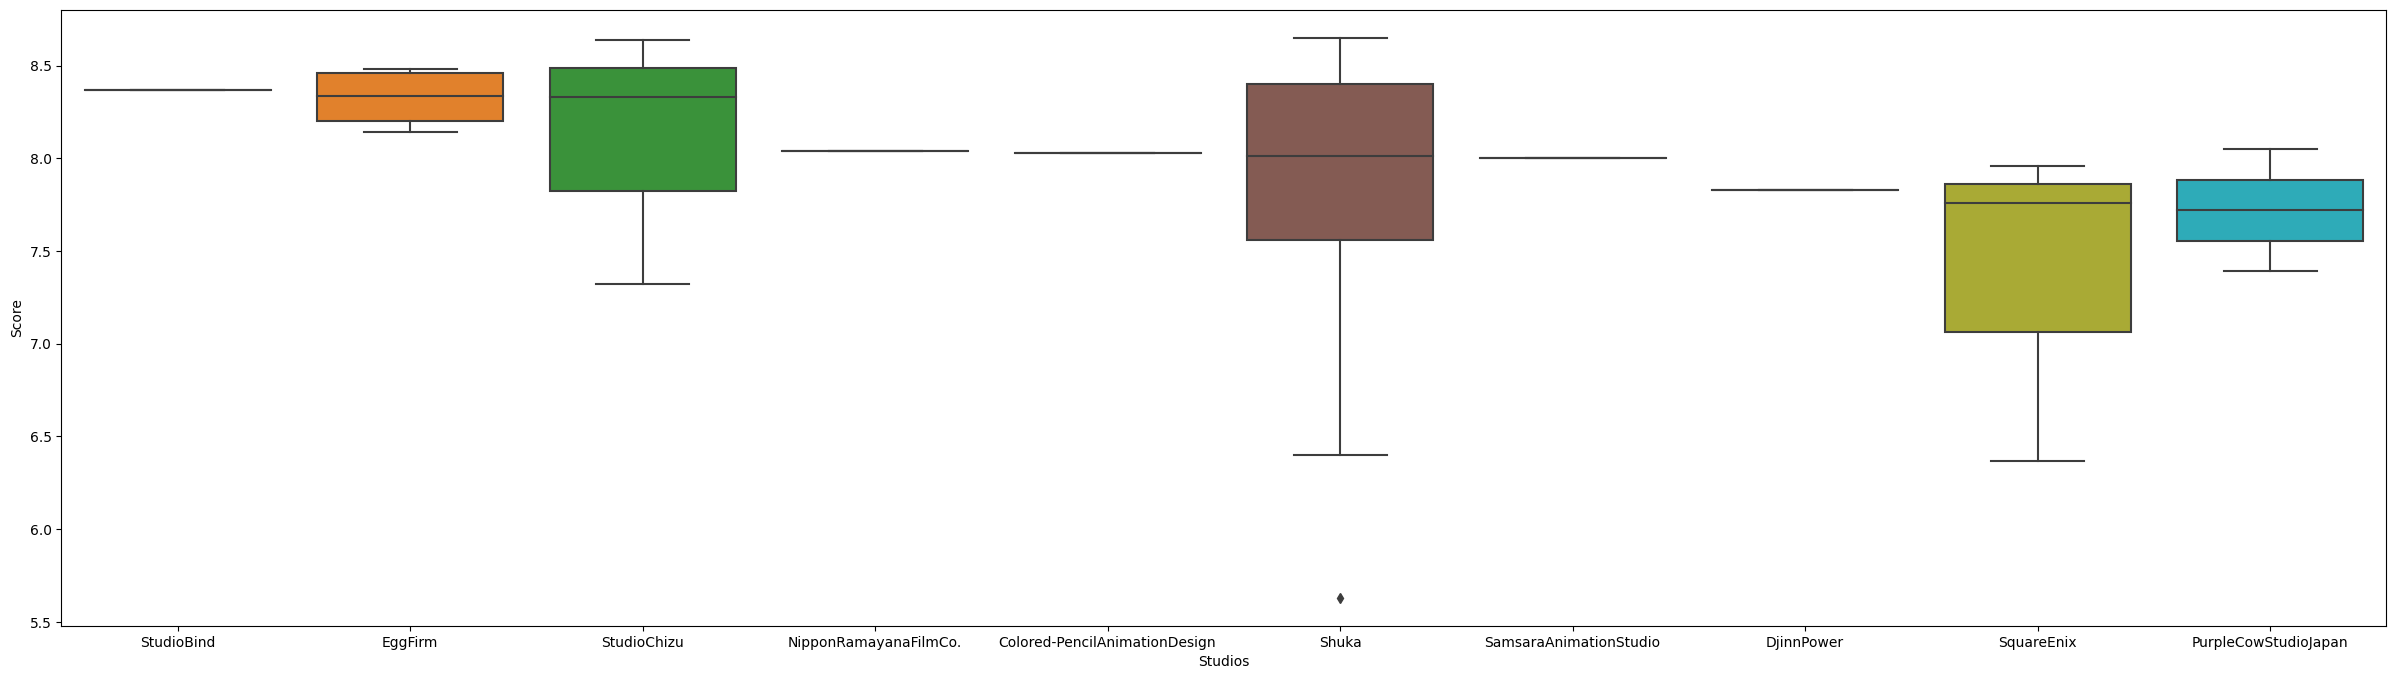

In [64]:
plt.figure(figsize=(30,8))
sns.boxplot(x = 'Studios', y = 'Score' , data= fil2, order = std_score__median_top10['Studios'] )

In [65]:
fil2_top10 = df_anime_aux2[df_anime_aux2['Studios'].isin(studios_top10)]
fil2_top10

,Studios,Score
0,Sunrise,8.780000
2,Madhouse,8.240000
3,Sunrise,7.270000
5,J.C.Staff,8.060000
6,NipponAnimation,7.590000
...,...,...
9659,StudioPierrot,7.420000
9690,Sunrise,7.010000
9697,Sunrise,7.807107
9717,TMSEntertainment,7.130000


In [66]:
std_score__median_top10  = fil2_top10.groupby(['Studios'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

std_score__median_top10

,Studios,Score
0,A-1Pictures,7.205
5,ProductionI.G,7.165
6,StudioDeen,7.100
9,TMSEntertainment,7.030
2,Madhouse,6.930
1,J.C.Staff,6.910
8,Sunrise,6.910
7,StudioPierrot,6.820
3,NipponAnimation,6.680
4,OLM,6.570


<AxesSubplot:xlabel='Studios', ylabel='Score'>

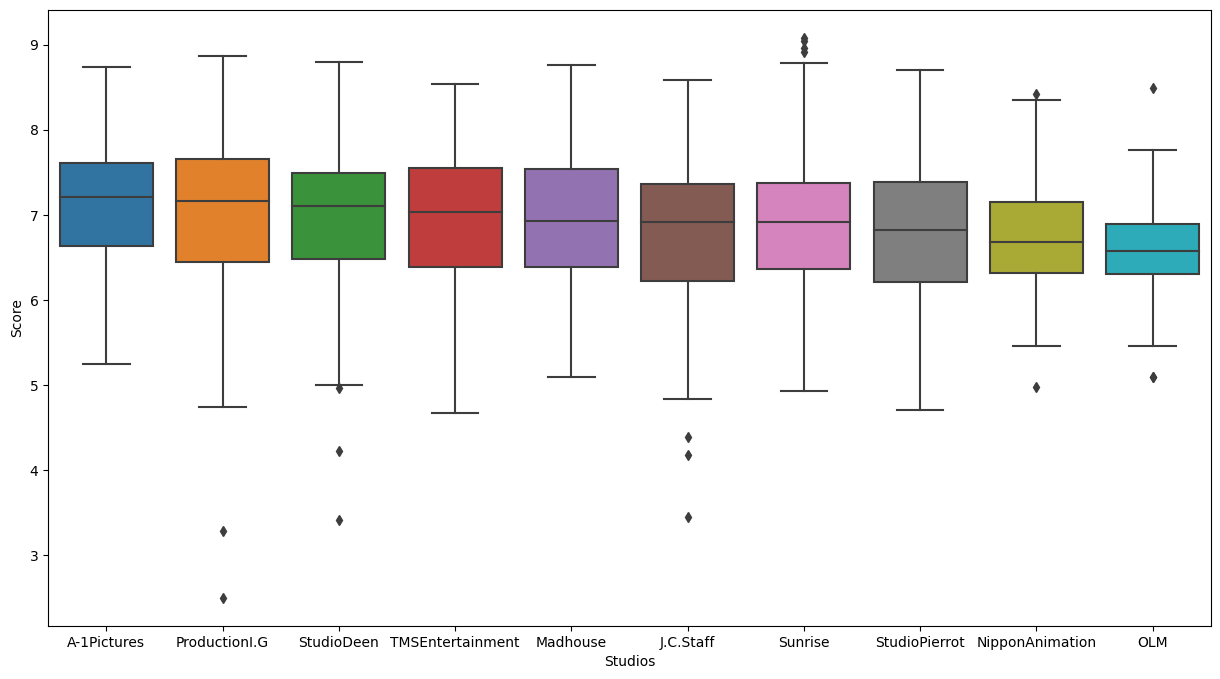

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(x= 'Studios' , y = 'Score', data = fil2_top10 , order= std_score__median_top10['Studios'] )

Se observa que el estudio A-1Pictures es el que tiene más puntaje entre los usuarios de myanimelist.net.

### Score - Rating

In [68]:
rating_score__median_top10  = df_anime_2.groupby(['Rating'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
rating_score__median_top10

,Rating,Score
3,R - 17+ (violence & profanity),7.190000
2,PG-13 - Teens 13 or older,6.880000
4,R+ - Mild Nudity,6.580000
1,PG - Children,6.500000
5,Rx - Hentai,6.480000
0,G - All Ages,6.365851


<AxesSubplot:xlabel='Rating', ylabel='Score'>

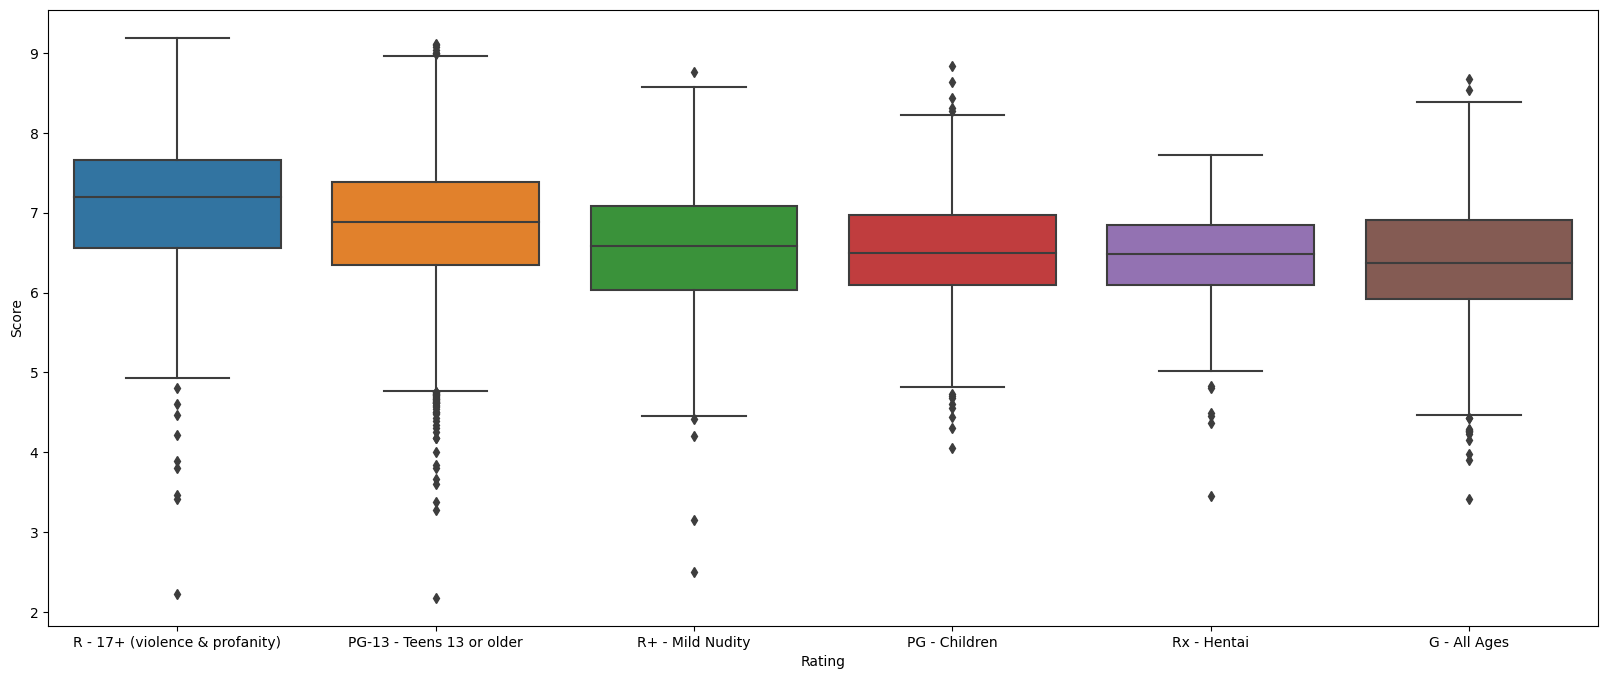

In [69]:
plt.figure(figsize=(20,8))
sns.boxplot(x= 'Rating' , y = 'Score', data = df_anime_2 , order= rating_score__median_top10['Rating'] )

Se observa que los animes más valorados son los que están aptos para un publico mayor a 17 años.

### Score - Start Season

<AxesSubplot:xlabel='Score', ylabel='Start_season'>

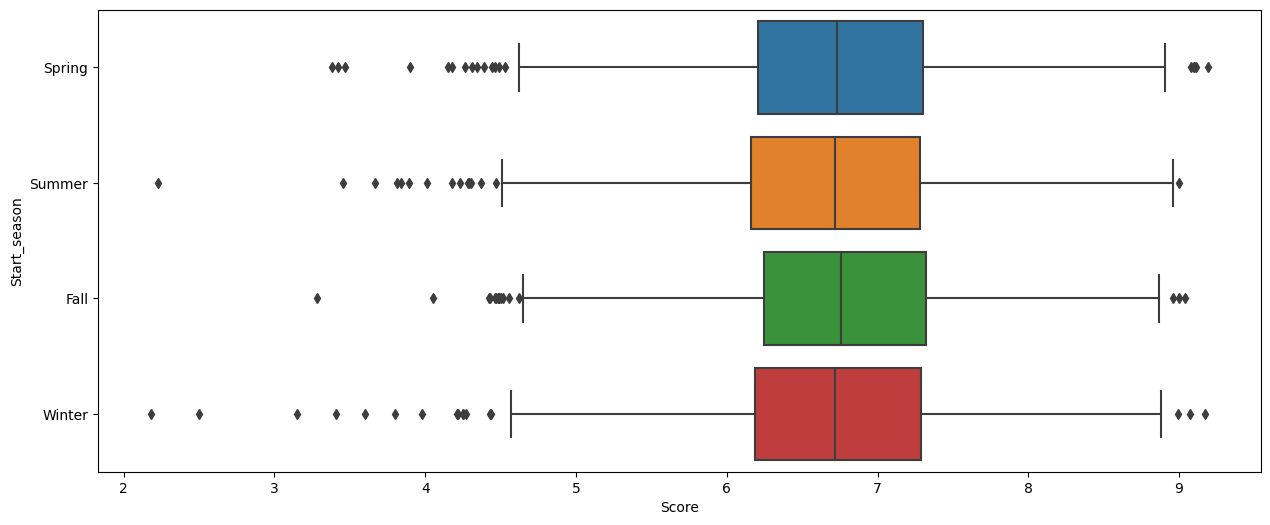

In [70]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Score', y = 'Start_season' , data= df_anime_2 )

In [71]:
df_score_season  = df_anime_2.groupby(['Start_season'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

df_score_season

,Start_season,Score
0,Fall,6.76
1,Spring,6.73
2,Summer,6.72
3,Winter,6.72


Se observa que los animes emitidos en otoño son los mejor valorados.

In [72]:
df_anime_2.head(2)

,Genres,Type,Episodes,Studios,Rating,Start_year,Start_season,Score,Genres_Split,Studios_Split
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,R - 17+ (violence & profanity),1998,Spring,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Sunrise]
1,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,R - 17+ (violence & profanity),2001,Summer,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",[Bones]


### Análisis Multivariante

In [73]:
#Eliminar columnas que sobran
df_anime_2.drop(['Genres','Studios','Genres_Split','Studios_Split','Start_year'] , axis = 1 , inplace = True)

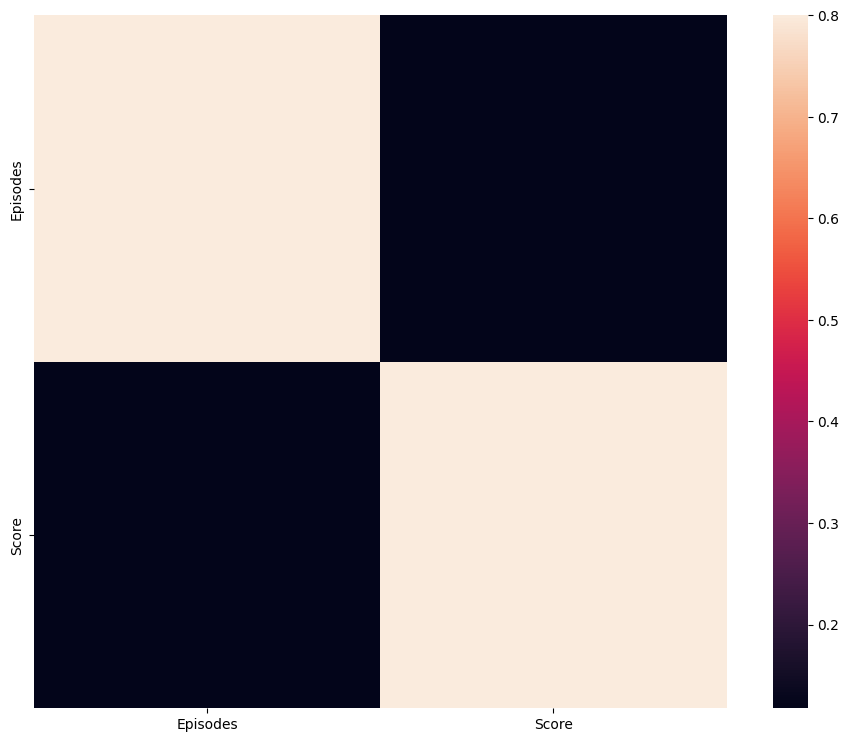

In [74]:
# Matriz de correlación:

corrmat = df_anime_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [75]:
df_anime_2.to_csv(path + "data/processed/anime.csv")

## Machine Learning

### Preprocesing

In [76]:
df_train = df_anime_2.copy()

In [77]:
# Obtener las variables categoricas del df
categorical_feature = (df_train.dtypes == "category") | (df_train.dtypes == object)
categorical_cols = df_train.columns[categorical_feature].tolist()

In [102]:
print('Valores unicos de',categorical_cols[0],': ',df_train[categorical_cols[0]].unique())
print('Valores unicos de',categorical_cols[1],': ',df_train[categorical_cols[1]].unique())
print('Valores unicos de',categorical_cols[2],': ',df_train[categorical_cols[2]].unique())

Valores unicos de Type :  ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music']
Valores unicos de Rating :  ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'PG - Children' 'R+ - Mild Nudity' 'G - All Ages' 'Rx - Hentai']
Valores unicos de Start_season :  ['Spring' 'Summer' 'Fall' 'Winter']


In [103]:
# Convetir los valores categoricos
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

In [104]:
print('Valores unicos de',categorical_cols[0],': ',df_train[categorical_cols[0]].unique())
print('Valores unicos de',categorical_cols[1],': ',df_train[categorical_cols[1]].unique())
print('Valores unicos de',categorical_cols[2],': ',df_train[categorical_cols[2]].unique())

Valores unicos de Type :  [5 0 3 4 2 1]
Valores unicos de Rating :  [3 2 1 4 0 5]
Valores unicos de Start_season :  [1 2 0 3]


In [226]:
df_train.dtypes

Type              int32
Episodes          int32
Rating            int32
Start_season      int32
Score           float64
dtype: object

### Training and Test split data

In [227]:
X = df_train.drop(['Score'], axis=1)
y = df_train['Score']

La evaluación, se realiza dividiendo los datos de la siguiente manera: 80% Train y 20% Test.

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

print('------Shapes------')
print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)
print('\n------Means------')
print("y_train mean:", round(np.mean(y_train),2), "\ny_test mean:", round(np.mean(y_test),2))

------Shapes------
Shape X_train: (7214, 4) 
Shape X_test: (1804, 4) 
Shape y_train: (7214,) 
Shape y_test: (1804,)

------Means------
y_train mean: 6.74 
y_test mean: 6.74


### Model Training

**Linear Reggression**

In [230]:
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train,y_train)

# make predictions
y_pred_lr = model_lr.predict(X_test)

# evaluate predictions
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_1r = mean_absolute_error(y_test, y_pred_lr)

print('R2: %.3f' % r2_lr)
print('MSE: %.3f' % mse_lr)
print('MAE: %.3f' % mae_1r)

R2: 0.025
MSE: 0.668
MAE: 0.646


**RandomForestRegressor**

In [234]:
# Model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(X_train, y_train)

# make predictions
y_pred_rf = model_rf.predict(X_test)

# evaluate predictions
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print('R2: %.3f' % r2_rf)
print('MSE: %.3f' % mse_rf)
print('MAE: %.3f' % mae_rf)

R2: 0.062
MSE: 0.643
MAE: 0.634


**DecisionTreeRegressor**

In [233]:
# Model
model_dt = DecisionTreeRegressor()

# Train the model
model_dt.fit(X_train, y_train)

# make predictions
y_pred_dt = model_dt.predict(X_test)

# evaluate predictions
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print('R2: %.3f' % r2_dt)
print('MSE: %.3f' % mse_dt)
print('MAE: %.3f' % mae_dt)

R2: -0.015
MSE: 0.695
MAE: 0.652


**Support Vector Regression**

In [235]:
# Model
model_svr = SVR()

# Train the model
model_svr.fit(X_train, y_train)

# make predictions
y_pred_svr = model_svr.predict(X_test)

# evaluate predictions
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print('R2: %.3f' % r2_svr)
print('MSE: %.3f' % mse_svr)
print('MAE: %.3f' % mae_svr)

R2: 0.096
MSE: 0.619
MAE: 0.619


**Kernel Ridge Regression**

In [248]:
# Model
model_krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=3)
# Train the model
model_krr.fit(X_train, y_train)

# make predictions
y_pred_krr = model_krr.predict(X_test)

# evaluate predictions
r2_krr = r2_score(y_test, y_pred_krr)
mse_krr = mean_squared_error(y_test, y_pred_krr)
mae_krr = mean_absolute_error(y_test, y_pred_krr)

print('R2: %.3f' % r2_krr)
print('MSE: %.3f' % mse_krr)
print('MAE: %.3f' % mae_krr)

R2: 0.131
MSE: 0.595
MAE: 0.607


Comparando resultados....

In [255]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest','Decision Tree','Support Vector',
                                  'Kernel Ridge'],
                        'R2': [r2_lr, r2_rf, r2_dt, r2_svr, r2_krr], 
                        'MSE': [mse_lr, mse_rf, mse_dt, mse_svr, mse_krr], 
                        'MAE': [mae_1r, mae_rf, mae_dt, mae_svr, mae_krr]})
results.round(3).sort_values(by = 'R2',ascending=False)

,Model,R2,MSE,MAE
4,Kernel Ridge,0.131,0.595,0.607
3,Support Vector,0.096,0.619,0.619
1,Random Forest,0.062,0.643,0.634
0,Linear Regression,0.025,0.668,0.646
2,Decision Tree,-0.015,0.695,0.652


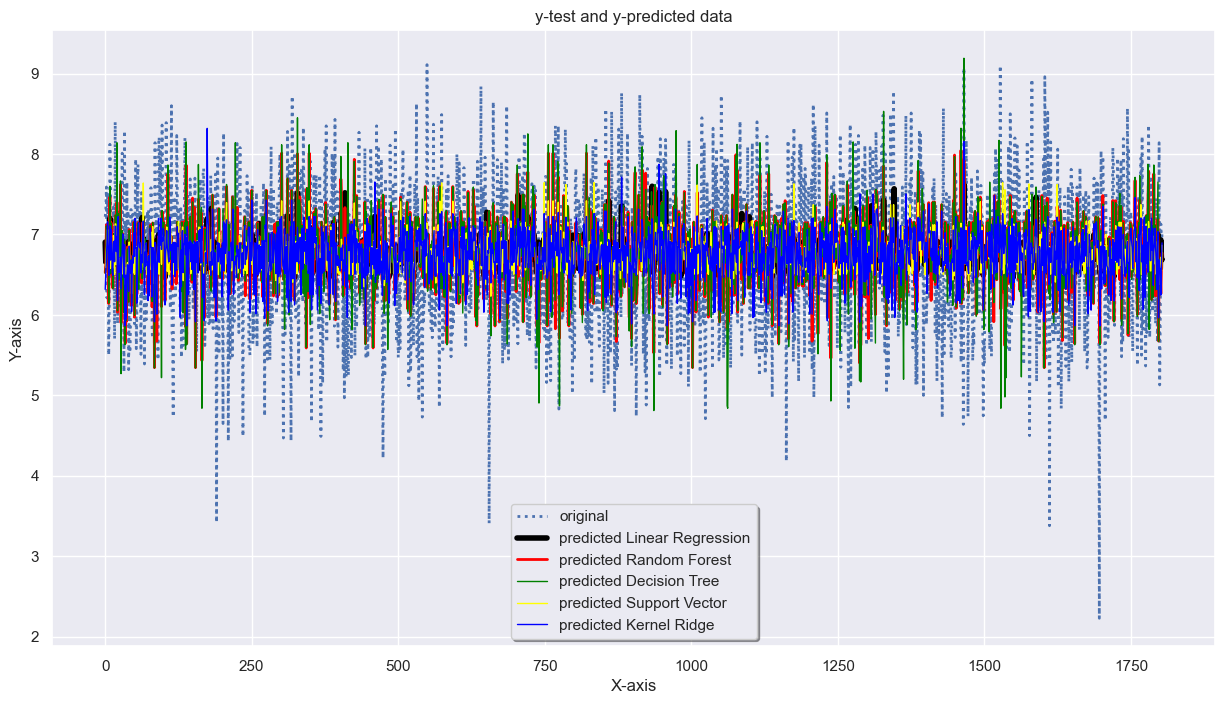

In [250]:
plt.figure(figsize = (15,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", ls=":")
plt.plot(x_ax, y_pred_lr, linewidth=4., label="predicted Linear Regression", c="black")
plt.plot(x_ax, y_pred_rf, linewidth=2, label="predicted Random Forest", c="red")
plt.plot(x_ax, y_pred_dt, linewidth=1, label="predicted Decision Tree", c="green")
plt.plot(x_ax, y_pred_svr, linewidth=1, label="predicted Support Vector", c="yellow")
plt.plot(x_ax, y_pred_krr, linewidth=1, label="predicted Kernel Ridge", c="blue")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Como se puede observar el modelo que predice mejores resultados es Kernel Ridge:\
R2: 0.131 (el valor más cercano a 1)\
MSE: 0.595 (el menor error de los modelos comparados, igual que el MAE)